<a href="https://colab.research.google.com/github/renzolea/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importaci√≥n de datos



In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


pd.options.display.float_format = '{:,.2f}'.format

tienda.head()

Producto Categor√≠a del Producto     Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos 164,300.00        6,900.00   
1    Mesa de comedor                Muebles 192,300.00        8,400.00   
2      Juego de mesa               Juguetes 209,600.00       15,900.00   
3         Microondas      Electrodom√©sticos 757,500.00       41,000.00   
4   Silla de oficina                Muebles 335,200.00       20,200.00   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas   lat    lon  
0  Tarjeta de cr√©dito                   8  4.61 -74.08  
1  Tarjeta de cr√©dito                   4  6.25 -75.56  
2  Tarjeta de cr√©dito                   1 10.40 -75.51  
3               Nequi                   1  3.44 -76.52  
4               Nequi                   1  6.25 -75.56

#1. An√°lisis de facturaci√≥n



In [18]:
# Calculate total revenue and count for each store directly
data_store1 = {'Store': ['Store 1'], 'Count_Items' : [len(tienda)], 'Total_Revenue' : [tienda['Precio'].sum()]}
data_store2 = {'Store': ['Store 2'], 'Count_Items' : [len(tienda2)], 'Total_Revenue' : [tienda2['Precio'].sum()]}
data_store3 = {'Store': ['Store 3'], 'Count_Items' : [len(tienda3)], 'Total_Revenue' : [tienda3['Precio'].sum()]}
data_store4 = {'Store': ['Store 4'], 'Count_Items' : [len(tienda4)], 'Total_Revenue' : [tienda4['Precio'].sum()]}

# Create DataFrames from the data
df_store1 = pd.DataFrame(data_store1)
df_store2 = pd.DataFrame(data_store2)
df_store3 = pd.DataFrame(data_store3)
df_store4 = pd.DataFrame(data_store4)


# Concatenate the DataFrames
revenue_summary = pd.concat([df_store1, df_store2, df_store3, df_store4], ignore_index=True)

# Set float format for display
pd.options.display.float_format = '{:,.2f}'.format

# Display the transposed summary
display(revenue_summary.set_index('Store').T)

Store                  Store 1          Store 2          Store 3  \
Count_Items           2,359.00         2,359.00         2,359.00   
Total_Revenue 1,150,880,400.00 1,116,343,500.00 1,098,019,600.00   

Store                  Store 4  
Count_Items           2,358.00  
Total_Revenue 1,038,375,700.00

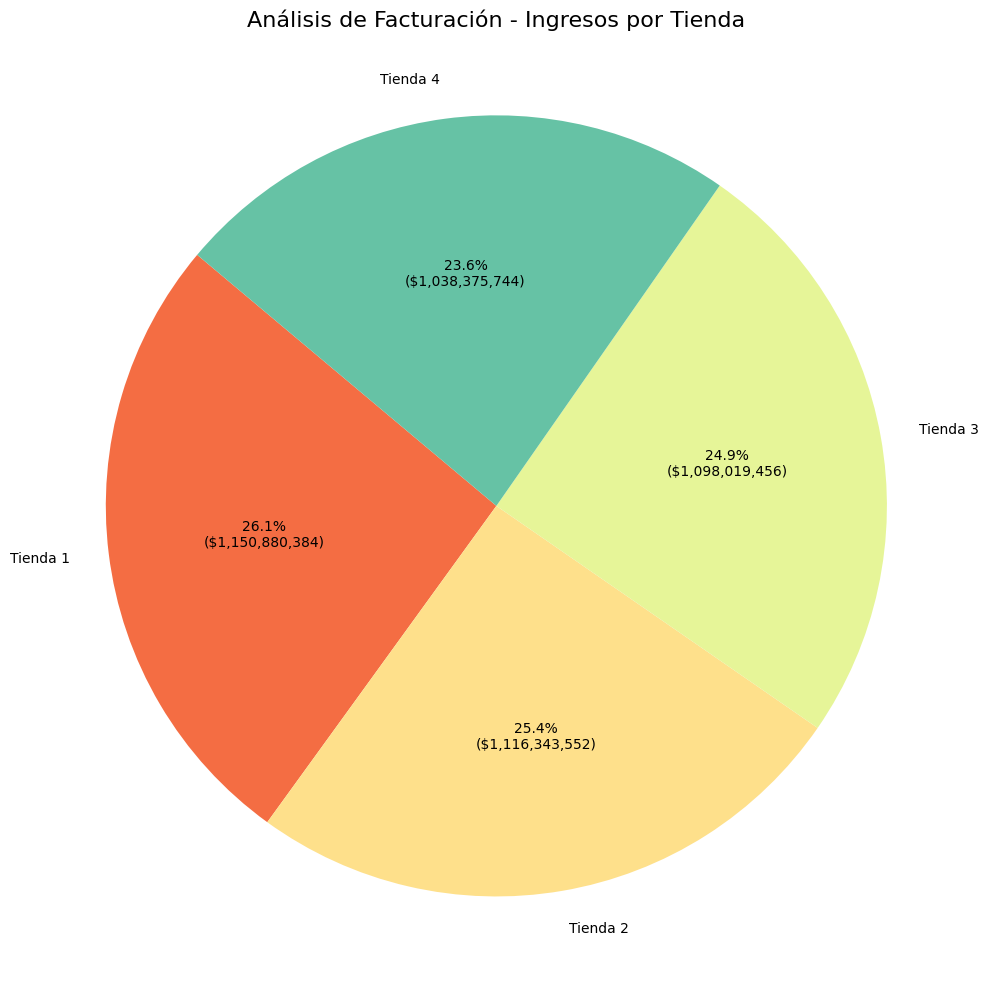

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the pie chart
plt.figure(figsize=(10, 10)) # Increased figure size for better label visibility

# Define a function to format the autopct labels with both percentage and value
def autopct_format(pct):
    total = sum(total_suma['Ingreso Total'])
    value = (pct/100.) * total
    return f'{pct:.1f}%\n(${value:,.0f})'


plt.pie(total_suma['Ingreso Total'], labels=total_suma['Tienda'], autopct=autopct_format, startangle=140, colors=sns.color_palette('Spectral', len(total_suma)), textprops={'fontsize': 10}) # Added textprops for label fontsize

# Add title
plt.title('An√°lisis de Facturaci√≥n - Ingresos por Tienda', fontsize=16)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# 2. Ventas por categor√≠a

In [23]:
# Group by category and count for each store directly
store1_category_counts = tienda.groupby('Categor√≠a del Producto').size().reset_index(name='Item_Count')
store1_category_counts['Store'] = 'Store 1'

store2_category_counts = tienda2.groupby('Categor√≠a del Producto').size().reset_index(name='Item_Count')
store2_category_counts['Store'] = 'Store 2'

store3_category_counts = tienda3.groupby('Categor√≠a del Producto').size().reset_index(name='Item_Count')
store3_category_counts['Store'] = 'Store 3'

store4_category_counts = tienda4.groupby('Categor√≠a del Producto').size().reset_index(name='Item_Count')
store4_category_counts['Store'] = 'Store 4'


# Concatenate the results
category_sales_summary = pd.concat([store1_category_counts, store2_category_counts, store3_category_counts, store4_category_counts], ignore_index=True)

# Pivot the table to make it horizontal
category_sales_horizontal = category_sales_summary.pivot(index='Categor√≠a del Producto', columns='Store', values='Item_Count')

category_sales_horizontal

Store                    Store 1  Store 2  Store 3  Store 4
Categor√≠a del Producto                                     
Art√≠culos para el hogar      171      181      177      201
Deportes y diversi√≥n         284      275      277      277
Electrodom√©sticos            312      305      278      254
Electr√≥nicos                 448      422      451      451
Instrumentos musicales       182      224      177      170
Juguetes                     324      313      315      338
Libros                       173      197      185      187
Muebles                      465      442      499      480

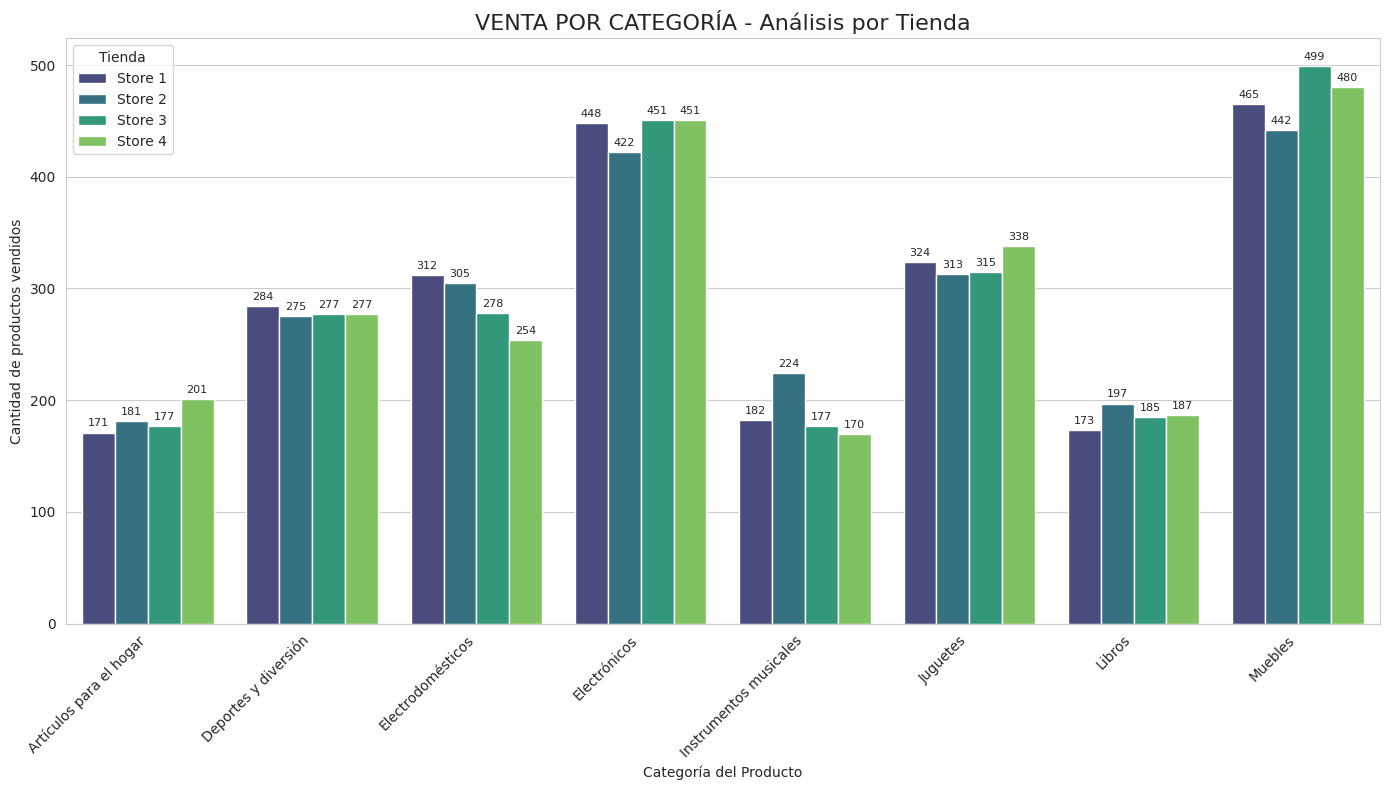

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data is now in category_sales_horizontal, which is pivoted
# We need to prepare it for plotting with seaborn
# Reset index to make 'Categor√≠a del Producto' a column
category_sales_horizontal_reset = category_sales_horizontal.reset_index()

# Melt the DataFrame back to a long format suitable for seaborn
category_sales_long = category_sales_horizontal_reset.melt(
    id_vars='Categor√≠a del Producto',
    var_name='Tienda',
    value_name='Cantidad'
)


# Design of the grouped bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8)) # Increased figure size

# Create the grouped bar plot
ax = sns.barplot(data=category_sales_long, x='Categor√≠a del Producto', y='Cantidad', hue='Tienda', palette='viridis', dodge=True) # Use dodge=True for grouping

# Add labels to the grouped bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=8) # Add labels


plt.title('VENTA POR CATEGOR√çA - An√°lisis por Tienda', fontsize=16) # Updated title
plt.xlabel('Categor√≠a del Producto')
plt.ylabel('Cantidad de productos vendidos')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 3. Calificaci√≥n promedio de la tienda


In [30]:
# Calculate average rating and count for each store directly
store1_rating_summary = {'Store_Name': ['Tienda 1'], 'Item_Count' : [len(tienda)], 'Average_Rating' : [tienda['Calificaci√≥n'].mean()]}
store2_rating_summary = {'Store_Name': ['Tienda 2'], 'Item_Count' : [len(tienda2)], 'Average_Rating' : [tienda2['Calificaci√≥n'].mean()]}
store3_rating_summary = {'Store_Name': ['Tienda 3'], 'Item_Count' : [len(tienda3)], 'Average_Rating' : [tienda3['Calificaci√≥n'].mean()]}
store4_rating_summary = {'Store_Name': ['Tienda 4'], 'Item_Count' : [len(tienda4)], 'Average_Rating' : [tienda4['Calificaci√≥n'].mean()]}

# Create DataFrames from the data
df_store1_rating = pd.DataFrame(store1_rating_summary)
df_store2_rating = pd.DataFrame(store2_rating_summary)
df_store3_rating = pd.DataFrame(store3_rating_summary)
df_store4_rating = pd.DataFrame(store4_rating_summary)


# Concatenate the DataFrames
average_rating_summary_df = pd.concat([df_store1_rating, df_store2_rating, df_store3_rating, df_store4_rating], ignore_index=True)

# Display the transposed summary
display(average_rating_summary_df.set_index('Store_Name').T)

Store_Name      Tienda 1  Tienda 2  Tienda 3  Tienda 4
Item_Count      2,359.00  2,359.00  2,359.00  2,358.00
Average_Rating      3.98      4.04      4.05      4.00

/tmp/ipython-input-32-1119772660.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=average_rating_summary_df, x='Average_Rating', y='Store_Name', palette='viridis') # Changed to horizontal and used 'viridis' palette


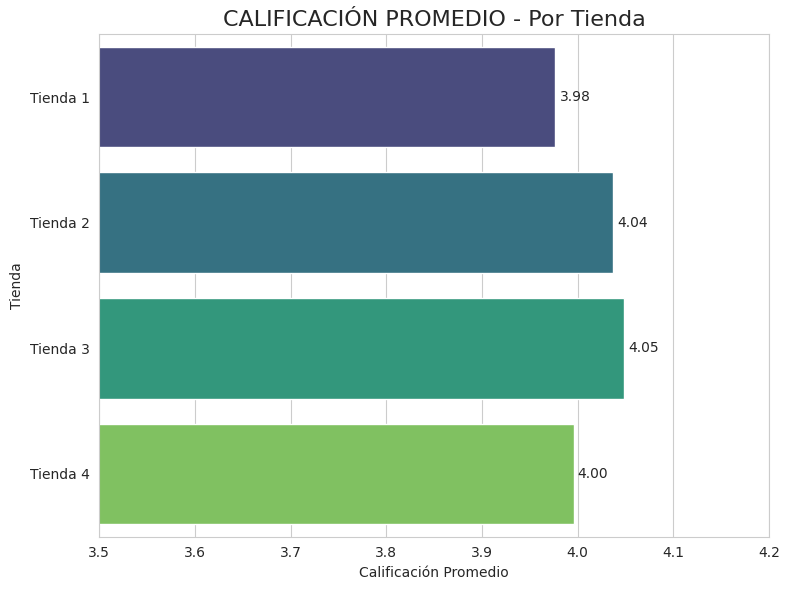

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data is in average_rating_summary_df with columns 'Store_Name' and 'Average_Rating'

# Design of the horizontal bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6)) # Adjusted figure size

# Create the horizontal bar plot
ax = sns.barplot(data=average_rating_summary_df, x='Average_Rating', y='Store_Name', palette='viridis') # Changed to horizontal and used 'viridis' palette

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)


plt.title('CALIFICACI√ìN PROMEDIO - Por Tienda', fontsize=16) # Updated title
plt.xlabel('Calificaci√≥n Promedio')
plt.ylabel('Tienda')
plt.xlim(3.5, 4.2) # Set a reasonable x-axis limit to emphasize differences
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# 4. Productos m√°s y menos vendidos

In [ ]:
#funci√≥n para contabilizar productos
def productos_tienda(df, nombre_tienda):
    conteo_productos = df['Producto'].value_counts()
    mas_vendido = conteo_productos.idxmax()
    menos_vendido = conteo_productos.idxmin()
    return pd.DataFrame({'Tienda' : [nombre_tienda], 'Producto m√°s vendido' : [mas_vendido], 'Producto menos vendido' : [menos_vendido]})

#Aplicar a la funcion por cada tienda
m1 = productos_tienda(tienda, 'Tienda 1')
m2 = productos_tienda(tienda2, 'Tienda 2')
m3 = productos_tienda(tienda3, 'Tienda 3')
m4 = productos_tienda(tienda4, 'Tienda 4')

#Concatenaci√≥n
productos_mas_menos_vendidos = pd.concat([m1, m2, m3, m4], ignore_index=True)
productos_mas_menos_vendidos

Tienda       Producto m√°s vendido     Producto menos vendido
0  Tienda 1                 Microondas  Auriculares con micr√≥fono
1  Tienda 2  Iniciando en programaci√≥n              Juego de mesa
2  Tienda 3              Kit de bancas    Bloques de construcci√≥n
3  Tienda 4                   Cama box         Guitarra el√©ctrica

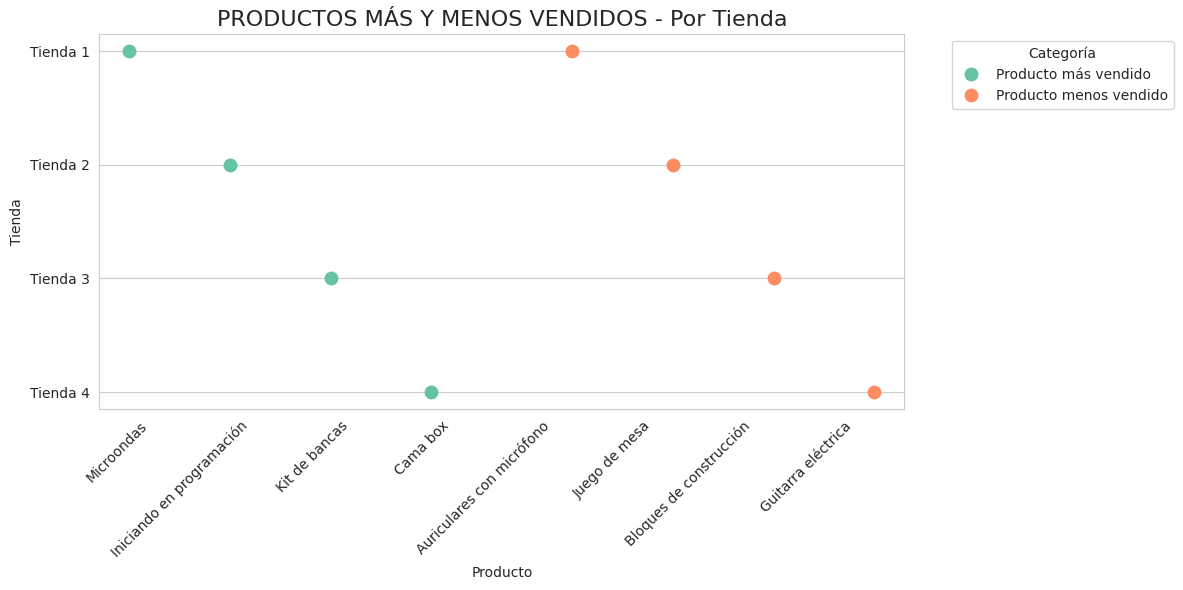

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar datos en formato largo
df_largo = pd.melt(
    productos_mas_menos_vendidos,
    id_vars='Tienda',
    value_vars=['Producto m√°s vendido', 'Producto menos vendido'],
    var_name='Tipo de Producto',
    value_name='Producto'
)

# Crear gr√°fico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Dibujar el gr√°fico de puntos
ax = sns.stripplot(data=df_largo, x='Producto', y='Tienda', hue='Tipo de Producto', dodge=True, palette='Set2', size=10)

# Est√©tica
plt.title('PRODUCTOS M√ÅS Y MENOS VENDIDOS - Por Tienda', fontsize=16)
plt.xlabel('Producto')
plt.ylabel('Tienda')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Categor√≠a', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5. Env√≠o promedio por tienda

In [ ]:
#funci√≥n para calcular promedio del env√≠o de cada tienda
def promedio_tienda_envio(df, nombre_tienda):
    contador_envio = len(df)
    suma_promedio_envio = df['Costo de env√≠o'].sum()/contador_envio
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [contador_envio], 'Promedio' : [suma_promedio_envio]})

#Aplicaci√≥n de la funci√≥n a todas las tiendas

e1 = promedio_tienda_envio(tienda, 'Tienda 1')
e2 = promedio_tienda_envio(tienda2, 'Tienda 2')
e3 = promedio_tienda_envio(tienda3, 'Tienda 3')
e4 = promedio_tienda_envio(tienda4, 'Tienda 4')

#concatenaci√≥n
promedio_envios = pd.concat([e1, e2, e3, e4], ignore_index=True)
promedio_envios

Tienda  Conteo  Promedio
0  Tienda 1    2359 26,018.61
1  Tienda 2    2359 25,216.24
2  Tienda 3    2359 24,805.68
3  Tienda 4    2358 23,459.46

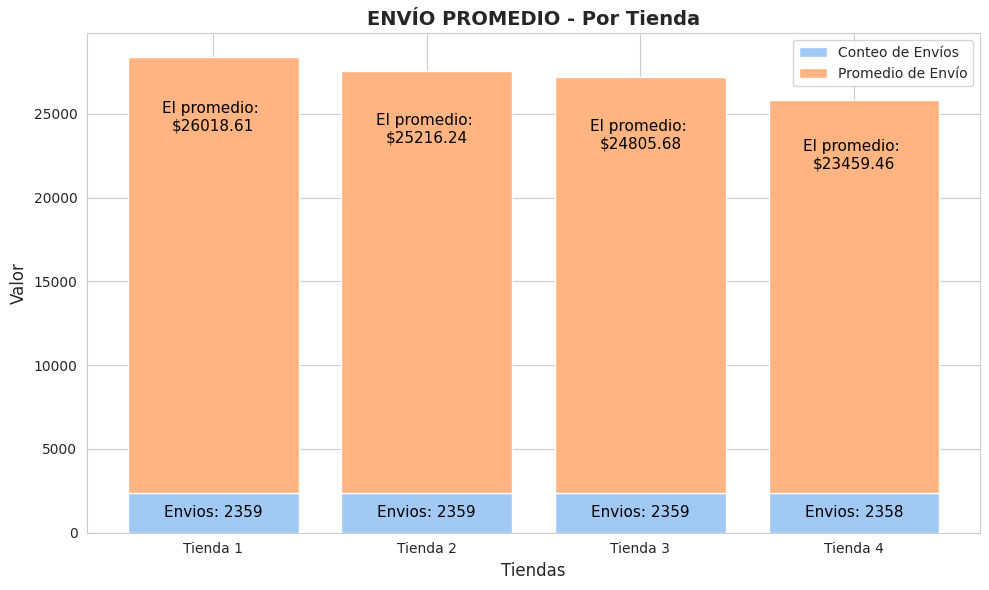

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set_style("whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(10,6))

# Datos base
tiendas = promedio_envios['Tienda']
conteo = promedio_envios['Conteo']
promedio = promedio_envios['Promedio']
ax.bar(tiendas, conteo, label='Conteo de Env√≠os')
ax.bar(tiendas, promedio, bottom=conteo, label='Promedio de Env√≠o')

# Mostrar valores en cada secci√≥n de la barra
for i in range(len(promedio_envios)):
    tienda = tiendas[i]
    c = conteo[i]
    p = promedio[i]

    # Texto sobre la barra de Conteo
    ax.text(i, c / 2, f'Envios: {c:.0f}', ha='center', va='center', color='black', fontsize=11)

    # Texto sobre la parte superior del Promedio
    top = c + p
    ax.text(i, top - (p * 0.1), f'El promedio: \n${p:.2f}', ha='center', va='top', color='black', fontsize=11)

# T√≠tulos y etiquetas
ax.set_title('ENV√çO PROMEDIO - Por Tienda', fontsize=14, fontweight='bold')
ax.set_xlabel('Tiendas', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_xticks(range(len(tiendas)))
ax.set_xticklabels(tiendas)
ax.legend()
plt.tight_layout()
plt.show()

#6. An√°lisis del desempe√±o geogr√°fico

In [ ]:
!pip install folium

In [ ]:
#Uni√≥n de todos los datasets como columnas

tienda['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

#DataFrames
ventas_geografico = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
ventas_geografico[['tienda', 'lat', 'lon', 'Precio', 'Calificaci√≥n']].head()

tienda   lat    lon     Precio  Calificaci√≥n
0  Tienda 1  4.61 -74.08 164,300.00             4
1  Tienda 1  6.25 -75.56 192,300.00             1
2  Tienda 1 10.40 -75.51 209,600.00             1
3  Tienda 1  3.44 -76.52 757,500.00             4
4  Tienda 1  6.25 -75.56 335,200.00             5

In [ ]:
import folium
from folium.plugins import HeatMap

# Crear un DataFrame base con solo latitud y longitud
map_data = ventas_geografico[['lat', 'lon', 'Precio']]

# Crear un mapa base centrado en el promedio de lat/lon
mapa = folium.Map(location=[map_data['lat'].mean(), map_data['lon'].mean()], zoom_start=5)

# A√±adir capa de heatmap ponderada por Precio
heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in map_data.iterrows()]
HeatMap(heat_data, radius=12).add_to(mapa)

mapa


# **INFORME FINAL** üìã


# **üìåIntroducci√≥n**

El presente informe tiene como objetivo brindar una recomendaci√≥n clara y objetiva al Sr. Juan respecto a cu√°l de sus cuatro tiendas deber√≠a considerar vender. Para tomar esta decisi√≥n estrat√©gica, se han analizado diversos factores relevantes en el desempe√±o de cada tienda: ingresos totales, categor√≠as de productos m√°s y menos vendidos, calificaciones promedio otorgadas por los clientes, productos con mayor y menor rotaci√≥n y el coste de env√≠o promedio. A partir de estos indicadores, se determina cu√°l tienda representa la opci√≥n m√°s viable para ser vendida, maximizando el valor de la transacci√≥n y minimizando el impacto negativo en el portafolio del Sr. Juan.

#**üìà Desarrollo**

1. **üßæ Ingresos Totales por Tienda**

Resultado obtenido en el primer requerimiento:

+ Tienda 1: $1,150,880,400.00

+  Tienda 2: $1,116,343,500.00

- Tienda 3: $1,098,019,600.00

- Tienda 4: $1,038,375,700.00


Gr√°fica del resultado:

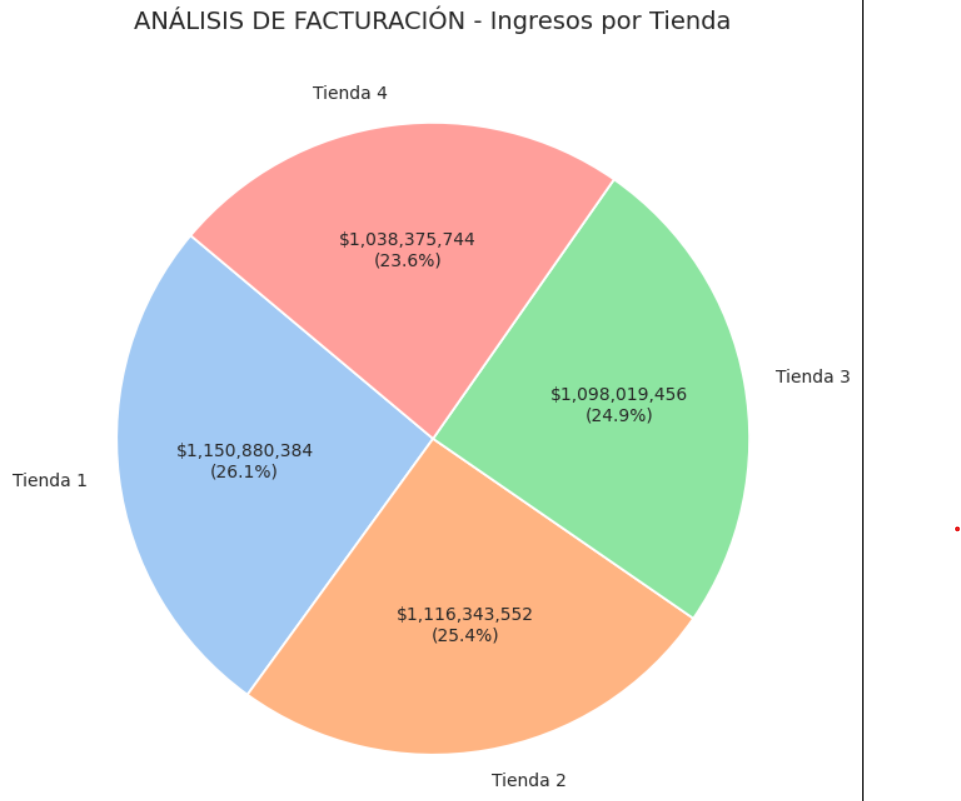


**An√°lisis:**
Tienda 1 lidera en ingresos totales, lo que sugiere un excelente desempe√±o comercial. Aunque las dem√°s tiendas tienen un n√∫mero similar de ventas, el monto recaudado por Tienda 1 es significativamente mayor.

2. **üõçÔ∏è Categor√≠as M√°s y Menos Vendidas**

Categor√≠a m√°s vendida en todas las tiendas:

+ Muebles

Categor√≠a menos vendida por tienda:

+ Tienda 1	Art√≠culos para el hogar (171)

+ Tienda 2	Art√≠culos para el hogar (181)

+ Tienda 3	Instrumentos musicales (177)

+ Tienda 4	Instrumentos musicales (170)

Gr√°fica de los resultados obtenidos:

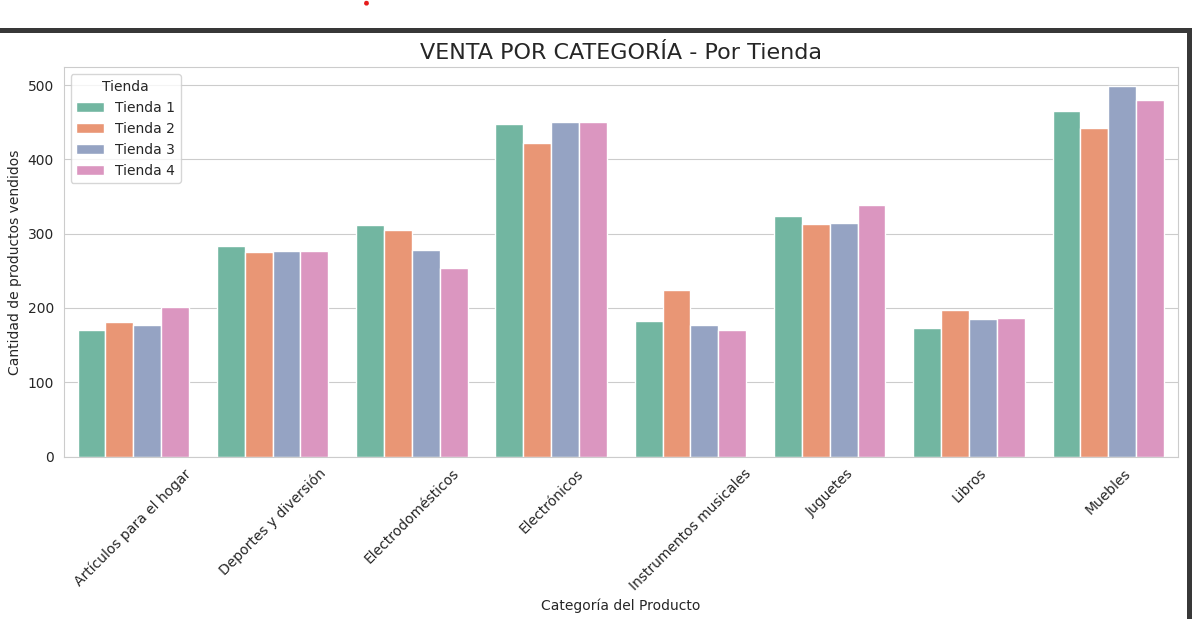

**An√°lisis:**
La consistencia de la categor√≠a ‚ÄúMuebles‚Äù como la m√°s vendida resalta una tendencia del consumidor. Por otro lado, ‚ÄúArt√≠culos para el hogar‚Äù e ‚ÄúInstrumentos musicales‚Äù presentan baja rotaci√≥n, lo que indica √°reas que pueden requerir ajustes en promoci√≥n o surtido.


3. **‚≠ê Calificaciones Promedio por Tienda**

Calificaci√≥n promedio por cada una de las tiendas:

+ Tienda 1:	3.98

+ Tienda 2:	4.04

+ Tienda 3:	4.05

+ Tienda 4:	4.00

Gr√°fica de los resultados obtenidos:
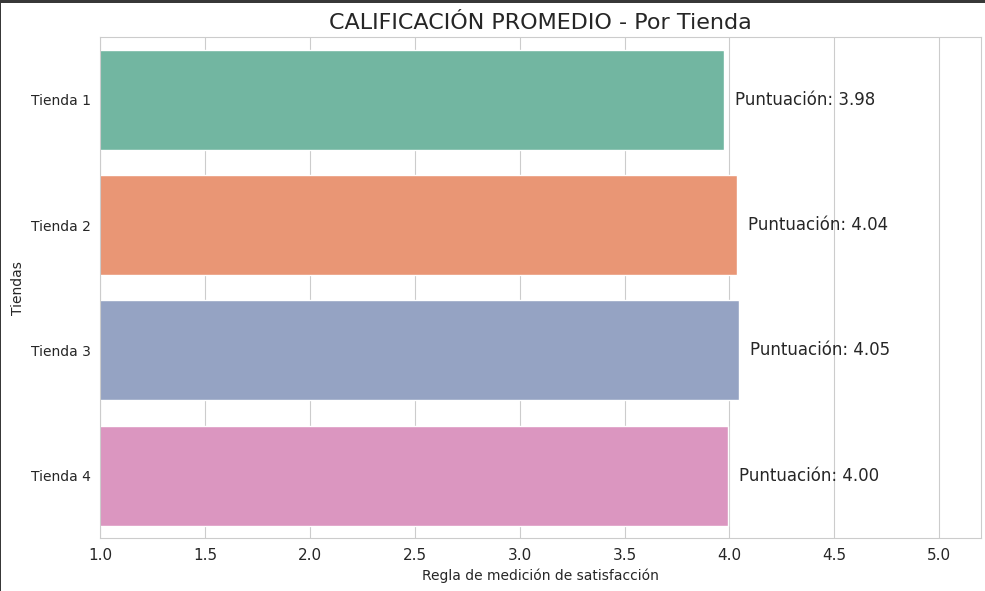

**An√°lisis:**
Tienda 3 presenta la mejor calificaci√≥n promedio, lo que refleja un mayor nivel de satisfacci√≥n por parte de los clientes. Aunque las diferencias son peque√±as, este aspecto podr√≠a ser crucial en decisiones de fidelizaci√≥n.


4. üéØ Productos M√°s y Menos Vendidos

Productos m√°s vendidos por tienda:

+ Tienda 1: Microondas
+ Tienda 2: Iniciando en programaci√≥n
+ Tienda 3:	Kit de bancas
+ Tienda 4:	Cama box

Productos menos vendidos por tienda

+ Tienda 1: Ariculares con micr√≥fono
+ Tienda 2: Juego de mesa
+ Tienda 3: Bloques de construcci√≥n
+ Tienda 4: Guitarra El√©ctrica

Gr√°fica de los resultados obtenidos:
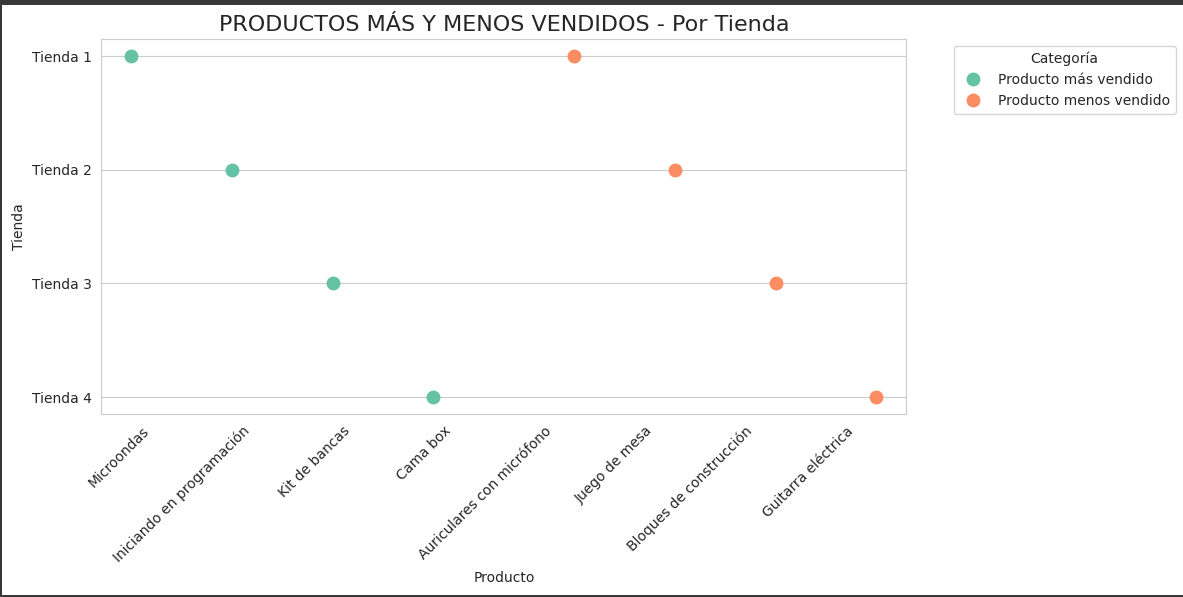

**An√°lisis:**
Cada tienda muestra particularidades en sus productos estrella y de bajo desempe√±o. Esto sugiere diferentes perfiles de consumidor seg√∫n la tienda, lo cual es √∫til para definir estrategias de surtido personalizado.


5. **üöö Costo de Env√≠o Promedio**

Promedios de Env√≠o por tienda:

+ Tienda 1:	$26,018.61

+ Tienda 2:	$25,216.24

+ Tienda 3:	$24,805.68

+ Tienda 4:	$23,459.46

Gr√°fica de los resultados obtenidos:
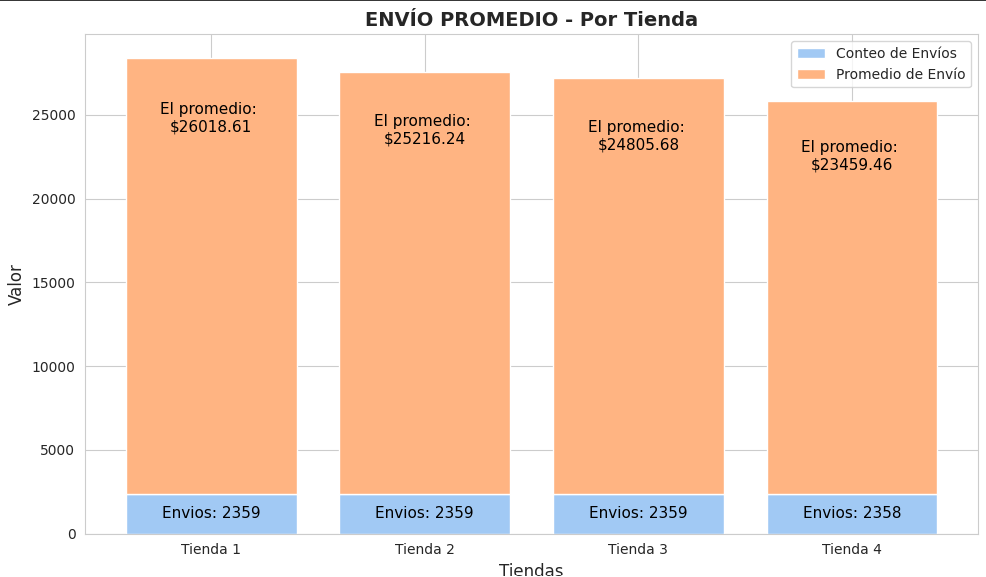


**An√°lisis:**
Tienda 4 destaca por tener el costo de env√≠o m√°s bajo. Aunque esto puede resultar atractivo para los clientes, es importante considerar si esto afecta el margen de ganancia. Tienda 1 tiene el env√≠o m√°s caro, aunque tambi√©n es la que m√°s ingresa.

6. **üìç Analisis geogr√°fico del Rendimiento**

Visualizaci√≥n Gr√°fica de los resultados:
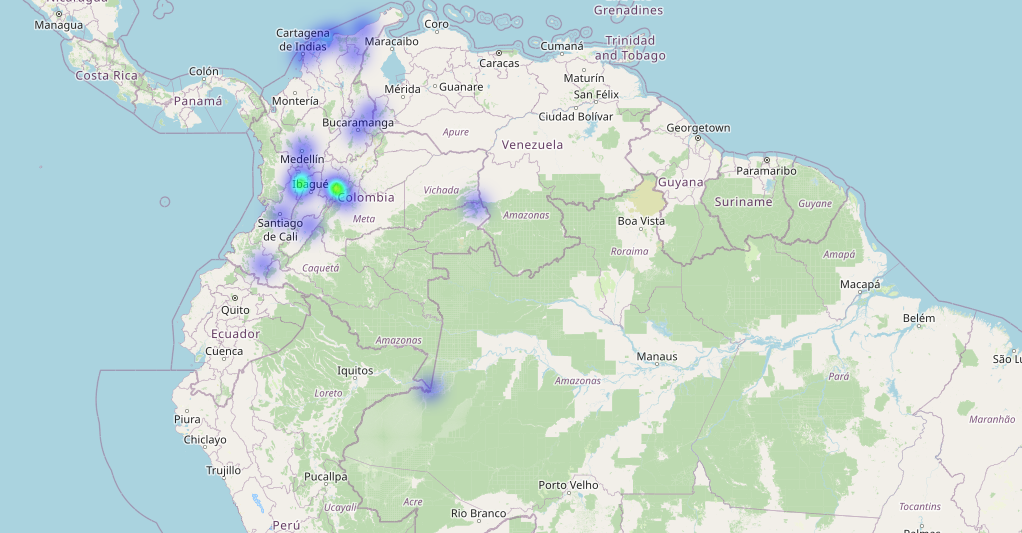

**An√°lisis:**
A trav√©s de mapas geoespaciales, se identificaron patrones en la distribuci√≥n de ventas y eficiencia por ubicaci√≥n.

##**‚úÖ Conclusi√≥n**

Tras el an√°lisis integral de los diferentes indicadores:

+ Tienda 1 lidera en ingresos totales, con un buen equilibrio de ventas y diversidad de productos vendidos, lo que sugiere una estrategia comercial efectiva.
Mientras Tienda 4 genera el menor ingreso total.

+ Tienda 3 destaca en satisfacci√≥n del cliente, aunque Tienda 4 no tiene la peor calificaci√≥n, est√° por debajo de Tienda 2 y Tienda 3, que reflejan una mejor experiencia percibida por el cliente.

+ Tienda 4 tiene productos de baja rotaci√≥n como "Guitarra el√©ctrica", que podr√≠an indicar menor demanda espec√≠fica. Adem√°s, sus productos estrella no reflejan una ventaja competitiva significativa frente a las otras tiendas.

+ Tienda 4 tiene el coste de env√≠o m√°s bajo, lo cual podr√≠a ser un punto a favor. Sin embargo, este beneficio log√≠stico no compensa completamente el rendimiento general m√°s bajo observado en otros indicadores.

+ La Tienda 4, a pesar de tener una buena cobertura de clientes, muestra menor rendimiento en t√©rminos de ingresos y cantidad de productos vendidos. Este an√°lisis refuerza la hip√≥tesis de que factores externos a la calidad del servicio, como la localizaci√≥n o la competencia local, podr√≠an estar afectando su desempe√±o.

##**üîé Recomendaci√≥n:**

Tomando en cuenta de forma integral todos los factores analizados, se recomienda al Sr. Juan **vender Tienda 4**.

+ Esta tienda muestra el rendimiento general m√°s bajo en t√©rminos de ingresos, ventas por categor√≠a, y diversidad de productos vendidos. Aunque cuenta con el coste de env√≠o m√°s bajo, este aspecto no es suficiente para compensar sus debilidades en los dem√°s indicadores.

+ El an√°lisis geoespacial indica que la ubicaci√≥n de la Tienda 4 podr√≠a estar limitando su crecimiento frente a otras tiendas m√°s competitivas.

+ Vender Tienda 4 permitir√° concentrar sus esfuerzos en las tiendas con mejor desempe√±o, como Tienda 1, Tienda 2 o Tienda 3, que mantienen una buena relaci√≥n entre ingresos, satisfacci√≥n del cliente y eficiencia log√≠stica. Adem√°s, la venta de Tienda 4 puede representar una oportunidad para reinvertir en mejoras tecnol√≥gicas, inventario o expansiones de mercado en sus tiendas m√°s rentables.



Por lo tanto, la recomendaci√≥n estrat√©gica es que el Sr. Juan proceda con la venta de Tienda 4, ya que esta acci√≥n permitir√° optimizar su portafolio comercial y reforzar el crecimiento sostenido de su negocio.

